In [2]:
#memanggil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/My Drive/anggreyni_mahasiswa/Praktikum_ml/Praktikum05/"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv(path+"Data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
# Cek duplicate
df.duplicated().sum()

np.int64(7308)

# Menghapus data duplikat
df = df.drop_duplicates()

# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

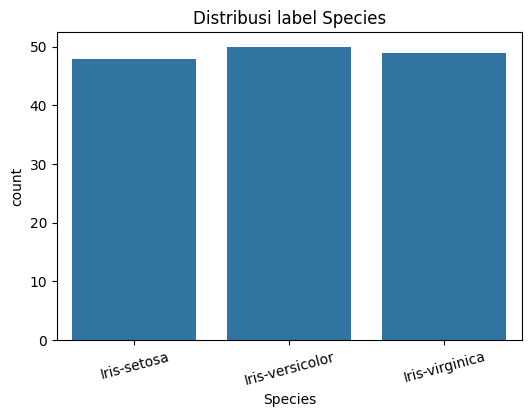

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Species',data=df)
plt.title('Distribusi label Species')
plt.xticks(rotation=15)
plt.show()

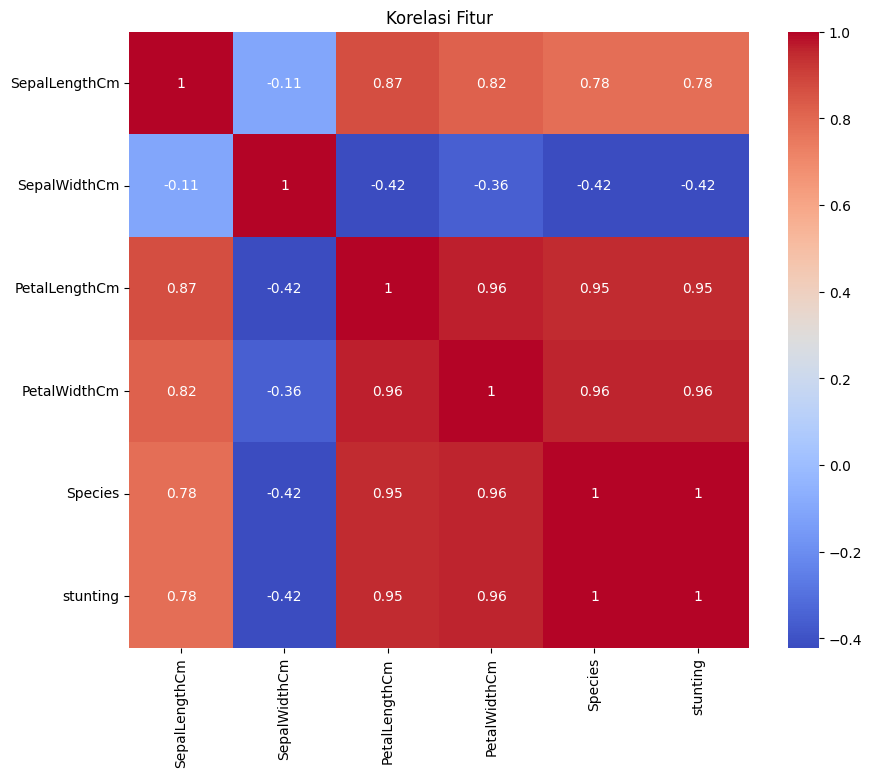

In [20]:
#korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [19]:
#Memilih fitur dan target
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df[feature_cols]
y = df['Species']

In [21]:
#Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
  )
len(X_train), len(X_test)

(117, 30)

In [24]:
#Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2),"%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred
))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [26]:
# mapping label -> kode untuk target
Species_cat = df['Species'].astype('category')
Species_classes = list(Species_cat.cat.categories)  # urutan kelas
df['stunting'] = Species_cat.cat.codes               # y numerik

# fitur kategorikal lain
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,stunting
0,8,14,4,1,0,0
1,6,9,4,1,0,0
2,4,11,3,1,0,0
3,3,10,5,1,0,0
4,7,15,4,1,0,0


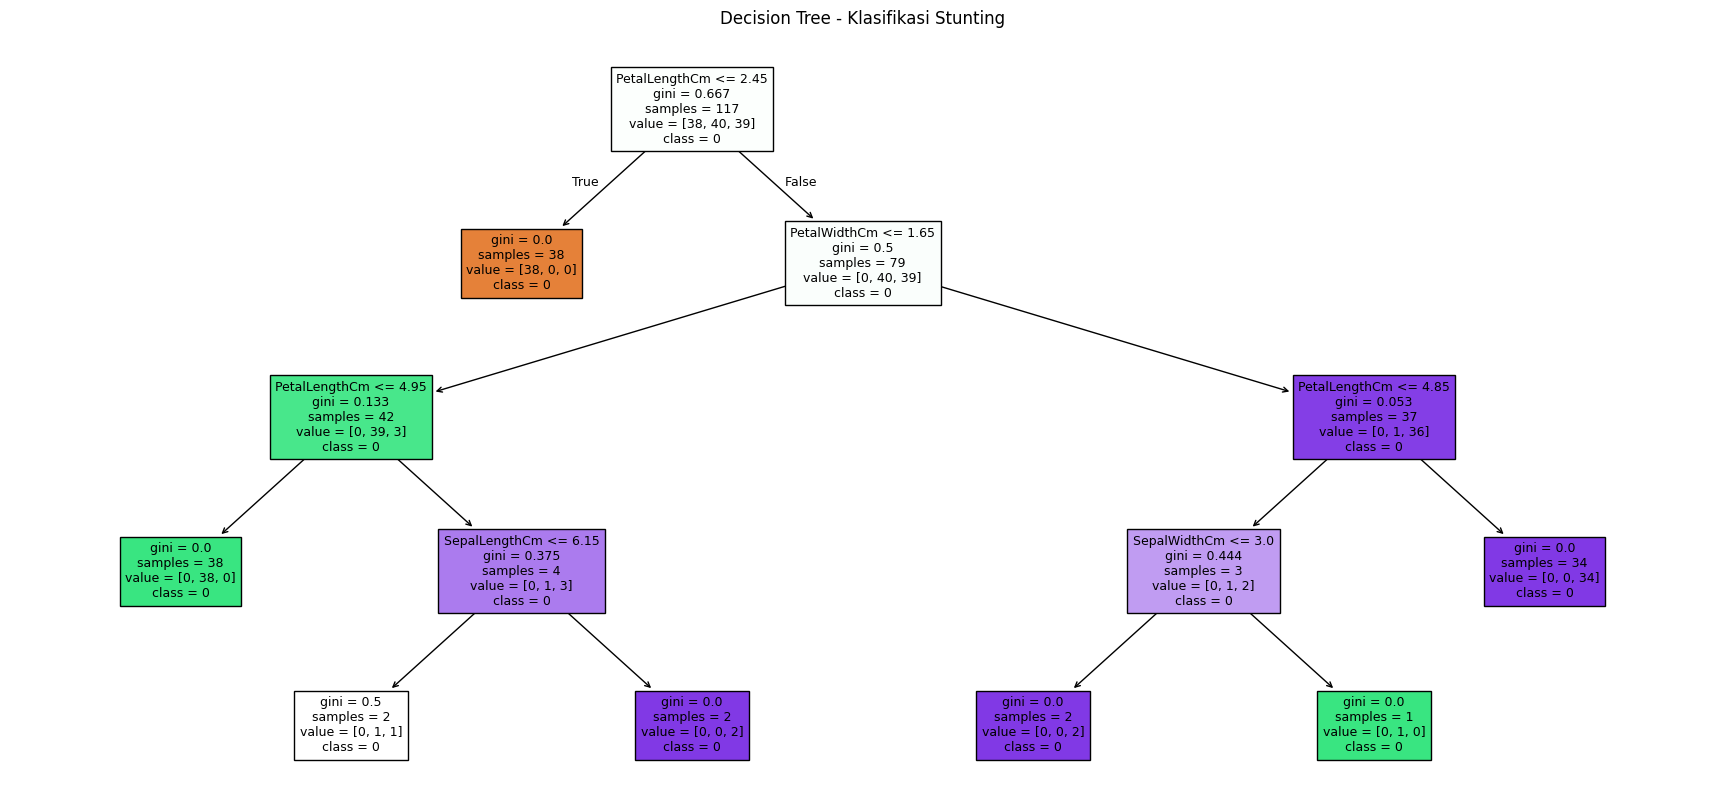

In [27]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=[str(c) for c in Species_cat],  # ubah ke string
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

Traceback (most recent call last):
  File "/tmp/ipython-input-4131219784.py", line 4, in <cell line: 0>
    plot_tree(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_export.py", line 205, in plot_tree
    return exporter.export(decision_tree, ax=ax)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_export.py", line 652, in export
    my_tree = self._make_tree(0, decision_tree.tree_, decision_tree.criterion)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_export.py", line 628, in _make_tree
    name = self.node_to_str(et, node_id, criterion=criterion)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-p

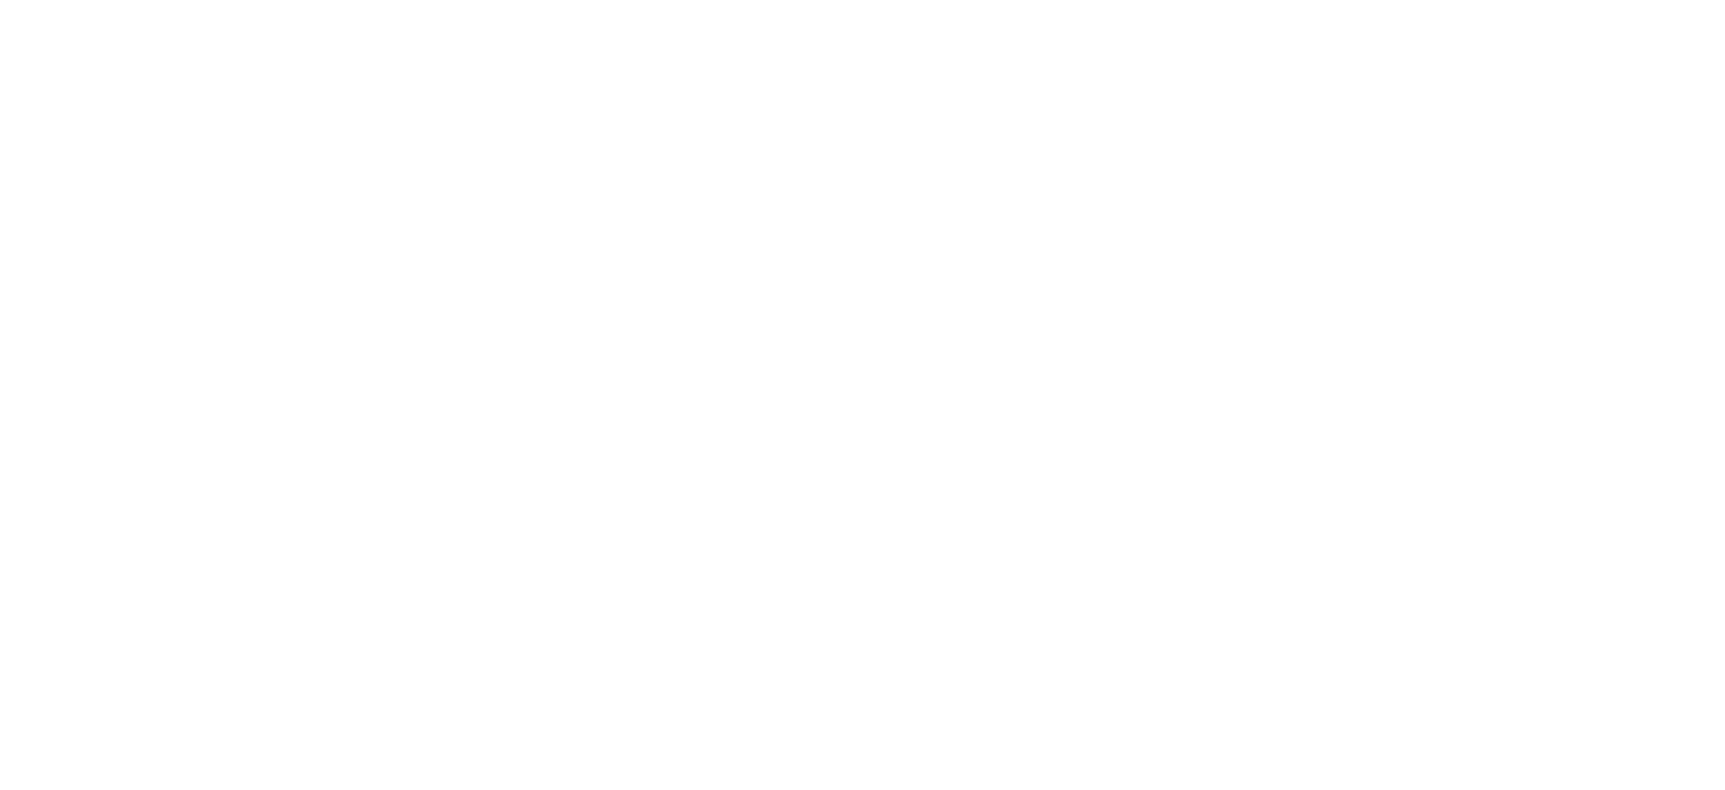

In [30]:
import traceback
try:
    plt.figure(figsize=(22,10))
    plot_tree(
        dt,
        feature_names=feature_cols,
        class_names=Species_classes,
        filled=True,
        fontsize=9
    )
    plt.title("Decision Tree - Klasifikasi Species")
    plt.show()
except TypeError as e:
    traceback.print_exc()

In [31]:
print(Species_classes)
print([type(i) for i in Species_classes])

[0, 1, 2]
[<class 'int'>, <class 'int'>, <class 'int'>]


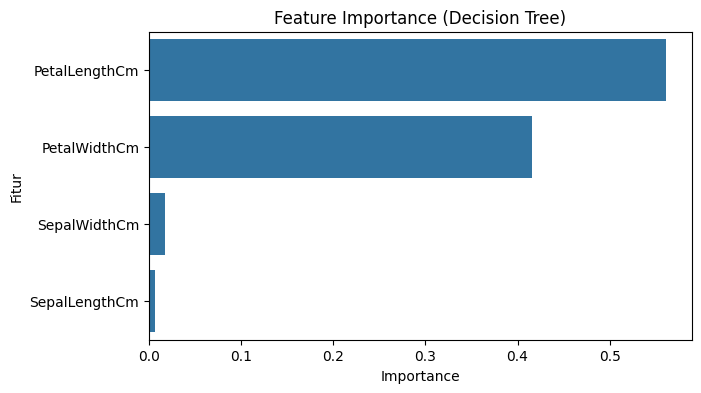

,0
PetalLengthCm,0.560816
PetalWidthCm,0.415369
SepalWidthCm,0.017320
SepalLengthCm,0.006495


In [32]:
# Fitur Importance
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp